<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/lab39_svm_rev5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM **Classifier**

# Linear Classification

## Binary classification

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X, y = iris.data, iris.target
X2 = X[:, :2]
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1            # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

Text(0, 0.5, 'Sepal width')

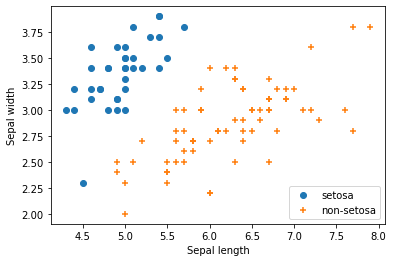

In [ ]:
import matplotlib.pyplot as plt
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [ ]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9809523809523809, 0.9777777777777777)

## Multi-class: use all 3 classes

Coefficients:  [[-114.57251644  165.80131533]
 [   2.3557126   -69.49352179]
 [  66.21199204  -76.72634271]] [  78.79909348  104.38733447 -178.46683519]
multi-class score:  0.5777777777777777


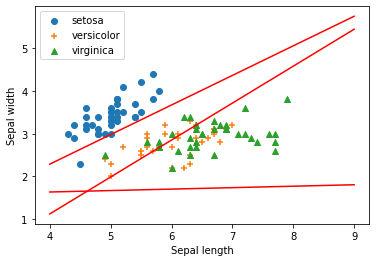

In [ ]:
# use all classes
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

X_train.shape, y_train.shape

markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
print("Coefficients: ", clf.coef_, clf.intercept_)
print("multi-class score: ", clf.score(X_test, y_test))

for i in range(3):
    a = clf.coef_[i,0]
    b = clf.coef_[i,1]
    c = clf.intercept_[i]
    xx = np.linspace(4,9,100)
    yy = -a/b * xx - c/b
    plt.plot(xx, yy, c='r')

- test set 애 대해 경계선을 그려보자

(61600,)
(220, 280)


[]

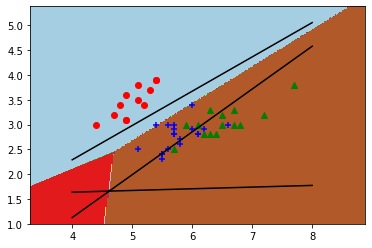

In [ ]:
# contour
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # column 으로 붙이기
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
# plt.contourf(xx, yy, Z)      # Z: height values over which the contour is drawn
# plt.axis('tight')
#-----------------------

markers = ['o', '+', '^']
colors = "rbg"

for i in range(3):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i], c=colors[i])
   
for i in range(3):
    a = clf.coef_[i,0]
    b = clf.coef_[i,1]
    c = clf.intercept_[i]
    xx = np.linspace(4,8,100)
    yy = -a/b * xx - c/b
    plt.plot(xx, yy, c='k')

plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)  # one vs. rest

array([[12,  0,  0],
       [ 1,  0, 18],
       [ 0,  0, 14]])

- one-vs-all (one-vs-rest)

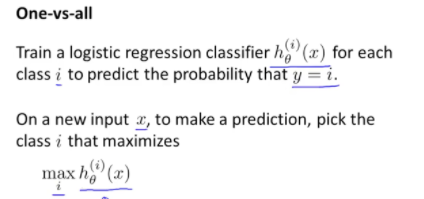

- another version for drawing

(61600,)
(220, 280)


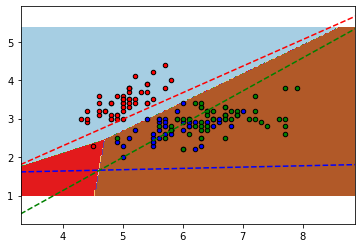

In [ ]:
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # column 으로 붙이기
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) # Z: height values over which the contour is drawn
# plt.axis('tight')

for i, color in zip(clf.classes_, ['r','b','g']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_   

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, ['r','b','g']):
    plot_hyperplane(i, color)

In [ ]:
xx.shape, yy.shape

((220, 280), (220, 280))

In [ ]:
xx, yy = np.meshgrid([1,2,3],[5,6])
print (xx, yy, xx.shape, yy.shape)
np.c_[xx.ravel(), yy.ravel()]

[[1 2 3]
 [1 2 3]] [[5 5 5]
 [6 6 6]] (2, 3) (2, 3)


array([[1, 5],
       [2, 5],
       [3, 5],
       [1, 6],
       [2, 6],
       [3, 6]])

# Linear SVM Classifier
- C 가 증가하면 곡선이 디테일해지고
- gamma 가 증가하면 섬들이 많이 생긴다

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X2 = X[:, :2]
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)
# X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

In [ ]:
from sklearn.svm import SVC

lin_clf = SGDClassifier(max_iter=1000)
lin_clf.fit(X_train, y_train)

svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [ ]:
print(svm_clf.score(X_test, y_test), lin_clf.score(X_test, y_test))
y_pred = svm_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
y_pred = lin_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

0.9777777777777777 0.9777777777777777
[[15  1]
 [ 0 29]]
[[15  1]
 [ 0 29]]


In [ ]:
svm_clf.coef_, svm_clf.intercept_, lin_clf.coef_, lin_clf.intercept_

(array([[ 3.33224623, -4.0727362 ]]),
 array([-5.14638224]),
 array([[ 32.87197232, -53.63321799]]),
 array([-9.57375365]))

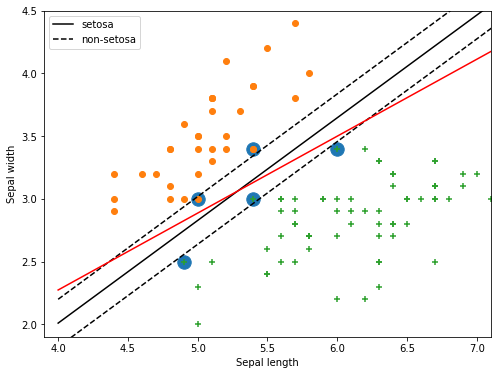

In [ ]:
plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/(np.sqrt(w[0]**2 + w[1]**2))
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180)  # support vectors
# plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 
# print(svs)

plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")
markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
# 선형분류 결정 경계선
a = lin_clf.coef_[0,0]
b = lin_clf.coef_[0,1]
c = lin_clf.intercept_
plt.plot(XX, (-a/b * XX - c/b), "r-")

In [ ]:
svs.shape   # support vectors

(4, 2)

# Non-linear SVM: Kernel Trick (커널 기법)
- SVM example with Iris dataset

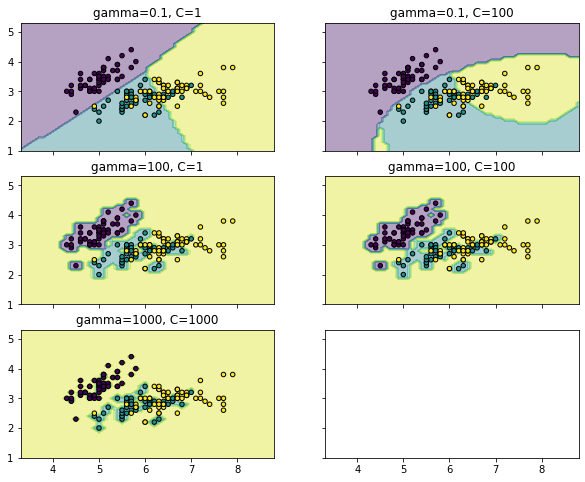

(0.82, 0.82, 0.92, 0.9266666666666666, 0.9266666666666666)

In [ ]:
from itertools import product
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)  # default 'ovr'
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# 확인
clf1.score(X, y), clf2.score(X, y), clf3.score(X, y), clf4.score(X, y), clf5.score(X,y)

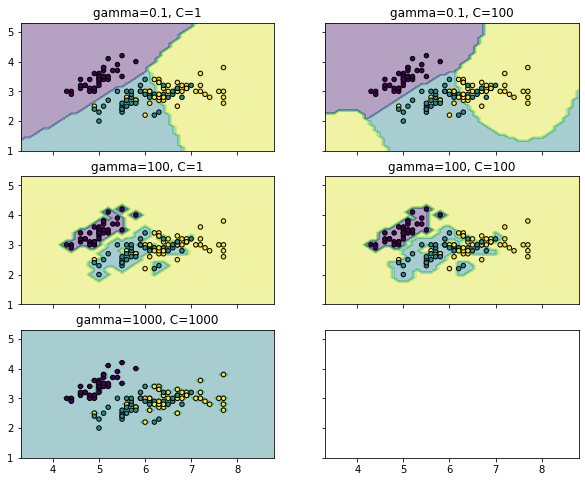

0.8083333333333333 0.8166666666666667 0.9416666666666667 0.9416666666666667 0.9416666666666667


In [ ]:
# for train and test data
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_train, y_train), 
       clf2.score(X_train, y_train),
       clf3.score(X_train, y_train),
       clf4.score(X_train, y_train),
       clf5.score(X_train, y_train))

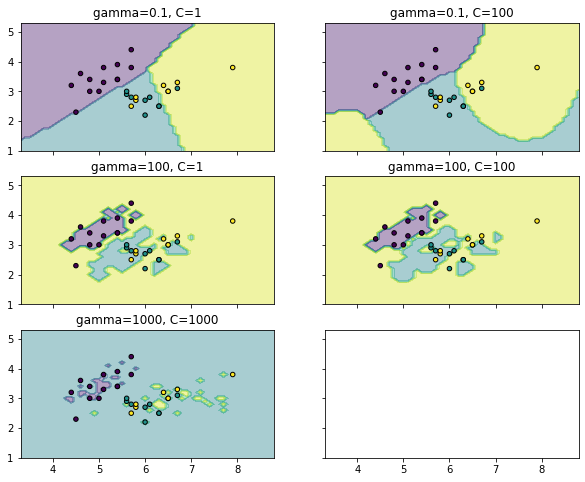

0.8333333333333334 0.8 0.5333333333333333 0.5 0.4666666666666667


In [ ]:
# for test data
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_test, y_test), 
       clf2.score(X_test, y_test),
       clf3.score(X_test, y_test),
       clf4.score(X_test, y_test),
       clf5.score(X_test, y_test))

# SVM Regression 

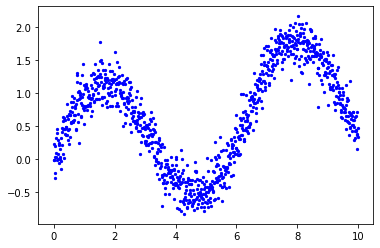

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(21)

N = 1000    
def makeData(x):    
    r = [a/10 for a in x]
    y = np.sin(x) + np.random.normal(0, 0.2, len(x))
    return np.array(y + r)

x = [i/100 for i in range(N)]
y = makeData(x)
x = np.array(x).reshape(-1,1)

plt.scatter(x, y, s=5, color="blue")
plt.show()

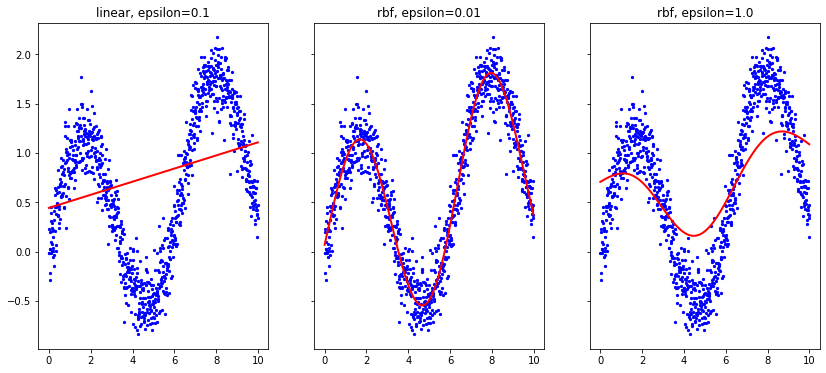

0.080161999560589 0.9272981404051117 0.5802043013218763


In [ ]:
svr1 = SVR(kernel='linear', epsilon=0.1).fit(x, y)
svr2 = SVR(epsilon=0.01).fit(x, y)
svr3 = SVR(epsilon=1.).fit(x, y)

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(14, 6))

for idx, svr_n, tt in zip(range(3),
                          [svr1, svr2, svr3],
                          ['linear, epsilon=0.1', 'rbf, epsilon=0.01','rbf, epsilon=1.0']):

    axarr[idx].scatter(x, y, s=5, color="blue", label="original")
    yfit = svr_n.predict(x)
    axarr[idx].plot(x, yfit, lw=2, color="red")
    axarr[idx].set_title(tt)

plt.show()

print (svr1.score(x, y), svr2.score(x, y), svr3.score(x, y))

# One more - binary XOR classification
- binary classification
- target to predict is a XOR of the inputs
- illustrate decision function learned by SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

In [ ]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [ ]:
X.shape, Y.shape

((300, 2), (300,))

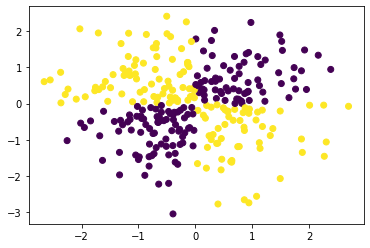

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [ ]:
# fit the model
clf = svm.SVC(gamma='auto')   # gamma = 'auto': uses 1/n_features
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
# ravel(): Return a contiguous flattened array.
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # evaluate the decision function

In [ ]:
Z.shape, xx.shape

((250000,), (500, 500))

In [ ]:
Z = Z.reshape(xx.shape)    # 500 x 500

In [ ]:
np.c_[xx.ravel(), yy.ravel()].shape

(250000, 2)

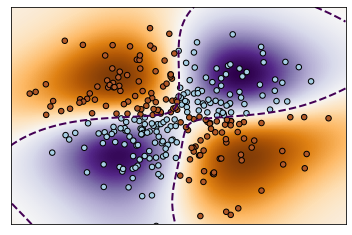

In [ ]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Comparison of many classifiers
- Decision Tree
- Knn
- SVC
- VotingClassifier (soft voting): The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

In [ ]:
xx, yy = np.meshgrid(np.linspace(0,2,3), np.linspace(0,2,3))
print(xx, '\n', yy)
xx.shape

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]] 
 [[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


(3, 3)

In [ ]:
xx.ravel()

array([0., 1., 2., 0., 1., 2., 0., 1., 2.])

In [ ]:
np.c_[xx.ravel(), yy.ravel()]

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [1., 2.],
       [2., 2.]])

In [ ]:
from itertools import product
list(product([0, 1], [0, 1]))

[(0, 0), (0, 1), (1, 0), (1, 1)]

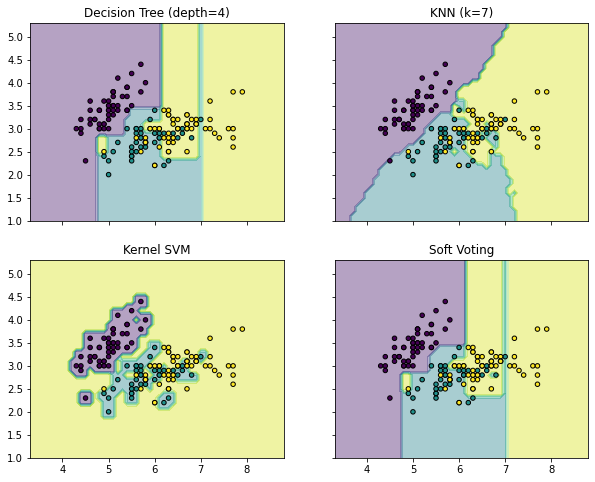

0.8533333333333334 0.82 0.9266666666666666 0.86


In [ ]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=6)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=1e2, C=100, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
print(clf1.score(X, y),clf2.score(X, y),clf3.score(X, y),eclf.score(X, y))

# Nonlinear by Polynomial features
- use Pipeline

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

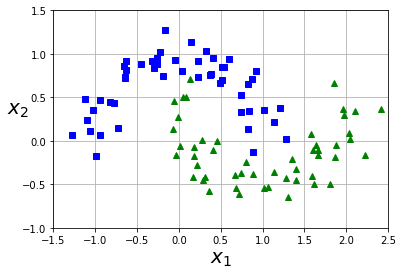

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=0.1, loss="hinge", random_state=42))
    ])

clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=0.1, loss='hinge', random_state=42))])

In [ ]:
clf.steps

[('poly_features', PolynomialFeatures(degree=3)),
 ('scaler', StandardScaler()),
 ('svm_clf', LinearSVC(C=0.1, loss='hinge', random_state=42))]

- Pipeline of transforms with a final estimator. 
  - Sequentially apply a list of transforms and a final estimator. 
  - Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. 
  - The final estimator only needs to implement fit. 
  - The transformers in the pipeline can be cached using memory argument.
- The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object:

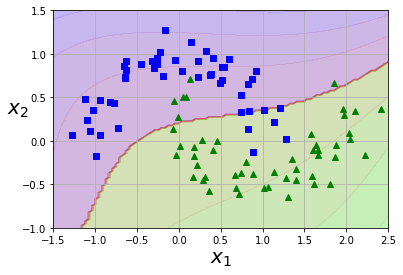

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# Exercise

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.88

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
X_digits, y_digits = load_digits(return_X_y=True)
pca1 = PCA()
svm1 = SVC()
pipe = Pipeline([('reduce_dim', pca1), ('clf', svm1)])
pipe.fit(X_digits, y_digits)

# The pca instance can be inspected directly
print(pca1.components_)

[[-1.77484909e-19 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 ...  1.76697117e-01
   1.94547053e-02 -6.69693895e-03]
 [-1.68358559e-18  1.83420720e-02  1.26475543e-01 ...  2.32084163e-01
   1.67026563e-01  3.48043832e-02]
 ...
 [ 0.00000000e+00  4.27173158e-16 -3.24255744e-16 ...  1.11022302e-16
  -5.55111512e-17  1.38777878e-16]
 [ 0.00000000e+00  5.01431234e-17 -9.75867742e-17 ... -6.93889390e-17
   5.55111512e-17 -3.46944695e-18]
 [ 1.00000000e+00 -1.68983002e-17  5.73338351e-18 ...  8.66631300e-18
  -1.57615962e-17  4.07058917e-18]]


In [ ]:
# meshgrid
xx, yy = np.meshgrid(np.linspace(1,5,5), np.linspace(1,3,3))
print(xx)
print(yy)
np.c_[xx.ravel(), yy.ravel()]

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]


array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [1., 2.],
       [2., 2.],
       [3., 2.],
       [4., 2.],
       [5., 2.],
       [1., 3.],
       [2., 3.],
       [3., 3.],
       [4., 3.],
       [5., 3.]])